<a href="https://colab.research.google.com/github/stardust-GS/time_series_proj/blob/main/TimeSeriesAnalysis_birth_of_females_1959.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd #data reading
import matplotlib.pyplot as plt #data visualisation
%matplotlib inline
#it displays plot without using plt.show

In [29]:
f_birth = pd.read_csv('daily-total-female-births-in-cal.csv')

In [30]:
f_birth.head()  #the columns are not specified properly

,Date,"Daily total female births in California, 1959"
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [17]:
type(f_birth)

pandas.core.frame.DataFrame

In [31]:
f_birth = pd.read_csv('daily-total-female-births-in-cal.csv', index_col = [0], parse_dates = [0])

In [32]:
f_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [21]:
f_birth = pd.read_csv('daily-total-female-births-in-cal.csv', index_col = [0], parse_dates = [0], squeeze = True)
# converted the data frame into series (using squeeze = true)

<ipython-input-21-f24443e192c3>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  f_birth = pd.read_csv('daily-total-female-births-in-cal.csv', index_col = [0], parse_dates = [0], squeeze = True)


In [22]:
f_birth.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64

In [23]:
type(f_birth)

pandas.core.series.Series

In [13]:
# Without parsing dates
df_without_parse = pd.read_csv('daily-total-female-births-in-cal.csv')
print(df_without_parse.dtypes)




Date                                             object
Daily total female births in California, 1959     int64
dtype: object


In [14]:
# With parsing dates
df_with_parse = pd.read_csv('daily-total-female-births-in-cal.csv', parse_dates=[0])
print(df_with_parse.dtypes)
#In some datasets, dates might be formatted in a way that pandas can automatically recognize them without explicit parsing

Date                                             object
Daily total female births in California, 1959     int64
dtype: object


In [33]:
f_birth.size

366

In [34]:
f_birth.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50
Daily total female births in California,1959


In [35]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,366.000000
mean,47.218579
std,100.472534
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,1959.000000


In [36]:
f_birth = f_birth[0:365]

In [37]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<Axes: xlabel='Date'>

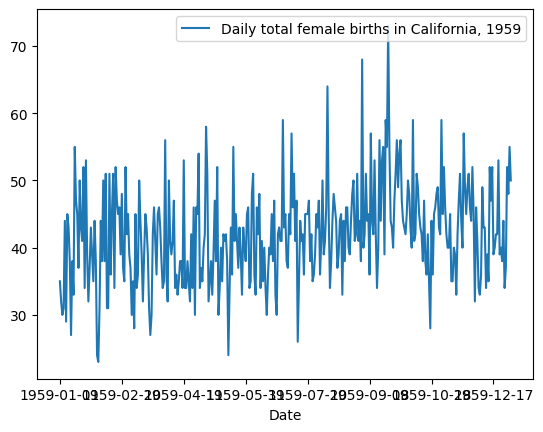

In [38]:
f_birth.plot()

In [43]:
f_birth_mean = f_birth.rolling(window = 30).mean()

<Axes: xlabel='Date'>

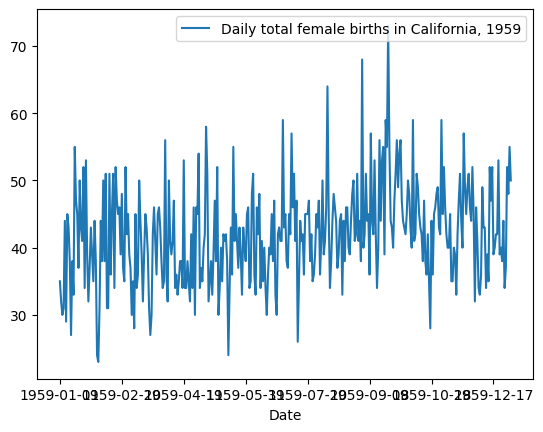

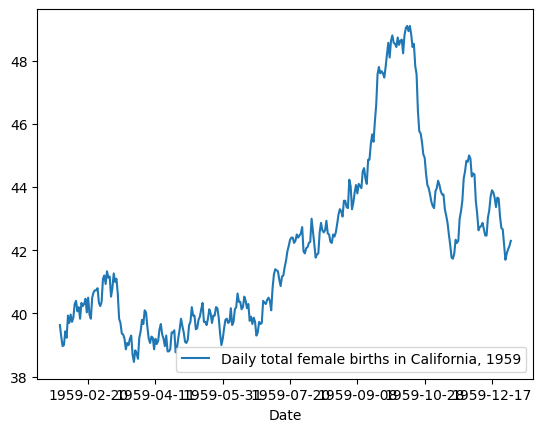

In [44]:
f_birth.plot()
f_birth_mean.plot()

In [45]:
#Baseline modelling
f_birth

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [46]:
birth_df = pd.concat([f_birth, f_birth.shift(1)], axis = 1)
#new variable - birth_df which has an additional column with shifted values

In [47]:
birth_df.head()

,"Daily total female births in California, 1959","Daily total female births in California, 1959"
Date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [59]:
birth_df.columns = ['Actual_Birth', 'Forecast_Birth']

In [60]:
birth_df.head()

,Actual_Birth,Forecast_Birth
Date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [61]:
birth_test = birth_df[1:366]

In [62]:
birth_test.head()

,Actual_Birth,Forecast_Birth
Date,,
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
1959-01-06,29,44.0


In [63]:
birth_test.tail()

,Actual_Birth,Forecast_Birth
Date,,
1959-12-27,37,34.0
1959-12-28,52,37.0
1959-12-29,48,52.0
1959-12-30,55,48.0
1959-12-31,50,55.0


In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np #to compute in arrays

In [66]:
birth_error = mean_squared_error(birth_test.Actual_Birth, birth_test.Forecast_Birth)
birth_error

84.22252747252747

In [67]:
np.sqrt(birth_error)

9.177283229394606

In [68]:
#ARIMA - Autoregressive Integrated Moving Average

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

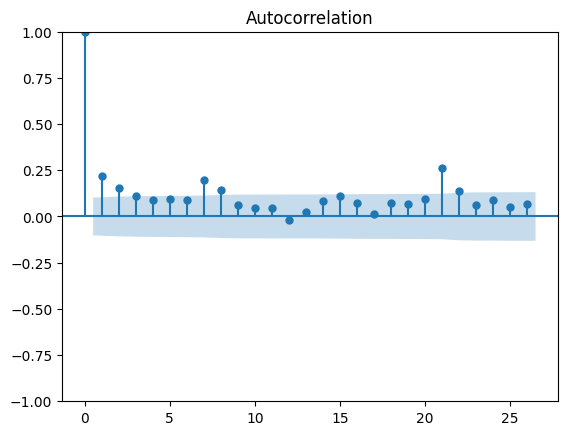

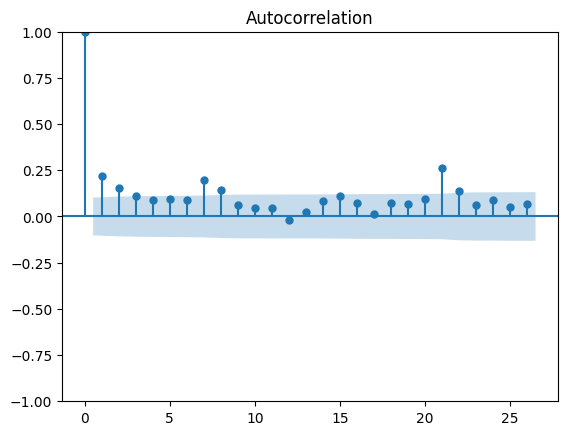

In [69]:
#plot_acf is to identify paramter Q
#ARIMA (p,q,d)
plot_acf(f_birth)

In [70]:
f_birth.size

365

In [71]:
# creating a variable for training
birth_train = f_birth[0 : 330]
birth_test = f_birth[330:365]

In [72]:
birth_train.size

330

In [73]:
birth_test.size

35

In [78]:
from statsmodels.tsa.arima_model import ARIMA

In [88]:
birth_model = ARIMA(birth_train, order=(2,1,3))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [89]:
birth_model_fit = birth_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
birth_model_fit.aic #lesser aic shows that the model is preferred

2229.8521116089773

In [97]:
birth_forecast = birth_model_fit.forecast(steps = 35)

In [98]:
birth_forecast

1959-11-27    45.020990
1959-11-28    44.991464
1959-11-29    44.578581
1959-11-30    44.736685
1959-12-01    44.450917
1959-12-02    44.655142
1959-12-03    44.417454
1959-12-04    44.625931
1959-12-05    44.411982
1959-12-06    44.612724
1959-12-07    44.414635
1959-12-08    44.604595
1959-12-09    44.419465
1959-12-10    44.598247
1959-12-11    44.424702
1959-12-12    44.592671
1959-12-13    44.429829
1959-12-14    44.587553
1959-12-15    44.434705
1959-12-16    44.582783
1959-12-17    44.439302
1959-12-18    44.578316
1959-12-19    44.443623
1959-12-20    44.574125
1959-12-21    44.447681
1959-12-22    44.570192
1959-12-23    44.451491
1959-12-24    44.566500
1959-12-25    44.455068
1959-12-26    44.563034
1959-12-27    44.458426
1959-12-28    44.559780
1959-12-29    44.461579
1959-12-30    44.556726
1959-12-31    44.464538
Freq: D, Name: predicted_mean, dtype: float64

In [99]:
birth_test

,"Daily total female births in California, 1959"
Date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [100]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

6.664571238848229